# An analysis of Covid-19 between ASEAN countries

## Introduction
The COVID-19 pandemic continues to cause illness and fatilies in many parts of the world. In others areas such as the Far East and my rural hometown in Thailand it seems that the pandemic situation in the year 2021 is only begining to unfold or is returning again.  I am interested to look at how different reponses by a specific set of contries can be compared and positive outcomes and actions identified. 


This project will be confined to an anylsis of COVID-19 and demographic information of different Association of Southeast Asian Nations (ASEAN). Current information about the spread of COVID-19 with the most complete COVID-19 dataset is sourced from the collection of the COVID-19 data maintained, collected and by published by Johns Hopkins University, "Our World in Data" website, from https://ourworldindata.org/coronavirus/country/thailand.


This project will use the source of COVID-19 data last dated June 2021 for countries in ASEAN area. ASEAN area include the following 10 countries: Thailand, Brunei Darussalam, Cambodia, Indonesia, Laos, Malaysia, Myanmar, Philippines, Singapore and Viet Nam. I will  extract data at differnet level to consider variations of cases, deaths, vaccinated, tests as well as the number population in different countries.

While conculsions on the action of different nations can be tracked against the impact of COVID-19 there are some limitatons on how this can diretly inform what responses have favourable outcomes.  Any conculsions need to always consider the origin of the data for each country in the target region.

## Dataset Descrption

The data maintained on the "Our World in Data" website has been derived from one or more sources for each of the 10 countries within the ASEAN area.  For each national government of these countries this data is considered to be the official source from which population and COVID-19 data is derrived.  The specific sited source from which the John Hopkins University data was derived is listed under Country Data Sources below.

The data for each country is open and freely available though assumptions that each variable should be directly comparable between any other nation in the group needs to be carefully considered.  The countires and agencies that have originally produced this data have many different forms of national government, regional infrasture, cultures and languages.  These will influence different variables in different ways that will likely impact in some way the accuracy and bias of comparing data if not the data itself.  So while the data may have been published in a consistent manner the anaylsis should considerate that the data was not orginally collected in a consistent manner using consistent variables when the data was collated within each country.

The offical national nature of the data being used does not contain personaly verifialbe information thoguh it may have done when it was collected.  Any impact this may have had on the concerns and willingness of citizens, healthcare officals and institutions is a limitation to any analysis.

The offical nature of the data being relased by the agencies reference for each country means that in some cases the data may have been limited by national priorities or local directvie.  This is both in how the data was released and publisehd and as to how the data was collected.        

## Dataset Preperation

Analysis of the data set required creating readable HTML from url, cleaning data as well as exploration and visualisation of data.  The output and conclusion will visulise to explan and understand the analysis and comparisions between these countries.

I performed web scraping using Python. I used the Beautiful Soup library to parse html data and convert it into a form that can be used for analysis. I performed cleaning of the data in Python and created useful barh plots to reveal interesting trends using Python's matplotlib libraries. After this tutorial, you should be able to use Python to easily scrape data from the web, apply cleaning techniques and extract useful insights from the data.

## Country Data Sources

- Indonesia:
National Board for Disaster Management: https://covid19.go.id/peta-sebaran

- Singapore:
Singapore Ministry of Health: https://www.moh.gov.sg/covid-19

- Thailand:
Ministry of Public Health, Department of Disease Control Dashboard: https://ddc.moph.go.th/viralpneumonia/eng/index.php
Ministry of Public Health, Department of Disease Control Situational Reports: https://covid19.ddc.moph.go.th/en

- World Health Organization (WHO): https://www.who.int/

## Import Libraries

I have created requests for getting the HTML contents of the website and lxml.html for parsing the relevant fields. Finally, I have stored the data on a Pandas Dataframe.

I have then used BeautifulSoup package to parse, prettify and extract information from the HTML. 

The URL of interest is url 'https://github.com/owid/covid-19-data/blob/master/public/data/latest/owid-covid-latest.csv'

In [1]:
# import package

# import the function BeautifulSoup from the package bs4
import requests
from bs4 import BeautifulSoup

# import pandas
import pandas as pd

# import numpy for cleaning data and doing basic statistic
import numpy as np

# import matplotlib for visualisation
import matplotlib.pyplot as plt

# displayed output inline
%matplotlib inline 

In [2]:
# Specify url: url
url = 'https://github.com/owid/covid-19-data/blob/master/public/data/latest/owid-covid-latest.csv'

# Package the request, send the request and catch the response : r
r = requests.get(url)

# Extracts from response as text: page
page = r.text

# Create a BeautifulSoup object from text: soup
soup = BeautifulSoup(page)

# Prettify the BeautifulSoup object to view how the tags are nested in the document: pretty_soup
pretty_soup = soup.prettify()

# Print the response
print(pretty_soup)

<!DOCTYPE html>
<html data-color-mode="auto" data-dark-theme="dark" data-light-theme="light" lang="en">
 <head>
  <meta charset="utf-8"/>
  <link href="https://github.githubassets.com" rel="dns-prefetch"/>
  <link href="https://avatars.githubusercontent.com" rel="dns-prefetch"/>
  <link href="https://github-cloud.s3.amazonaws.com" rel="dns-prefetch"/>
  <link href="https://user-images.githubusercontent.com/" rel="dns-prefetch"/>
  <link crossorigin="anonymous" href="https://github.githubassets.com/assets/frameworks-07f8e3eaa717980c06521fc51bb99fa5.css" integrity="sha512-B/jj6qcXmAwGUh/FG7mfpfFSb0lW1UpGiufFhzIeC+u3lXE5VDEJQzVxZ3gquw8xjZBNQ6CgWDSgCgjRzqPUgw==" media="all" rel="stylesheet"/>
  <link crossorigin="anonymous" href="https://github.githubassets.com/assets/behaviors-e863ce8cac94cf2054f60957898af955.css" integrity="sha512-6GPOjKyUzyBU9glXiYr5VayiMkmbK4LqbAjTke98cFsYGAMpdfhoyecnPX/K+2It8hZkRsp26FN+CRtyEJ/oGA==" media="all" rel="stylesheet"/>
  <link crossorigin="anonymous" href="

In [3]:
# Print the status code from the request  : r = requests.get(url)
print(r.status_code)

200


The request was successful with <Response [200]> 
If instead, the response code was [404] this would means it could not give access to the HTML of the website, and therefore can not scrape the table on that site.

In [4]:
# print 'content-type'
print(r.headers['content-type'])

# display encoding from response
print(r.encoding)

text/html; charset=utf-8
utf-8


## Get the data from HTML  

In [5]:
# Using a function called find(). 
# find()will go through the HTML and only return the HTML that you want to find
# Select only the table class
table_data = soup.find('table', {'class':'js-csv-data csv-data js-file-line-container'})
print(table_data)

<table class="js-csv-data csv-data js-file-line-container">
<thead>
<tr class="js-file-line" id="LC1">
<td class="blob-num js-line-number" data-line-number="1" id="L1"></td>
<th>iso_code</th>
<th>continent</th>
<th>location</th>
<th>last_updated_date</th>
<th>total_cases</th>
<th>new_cases</th>
<th>new_cases_smoothed</th>
<th>total_deaths</th>
<th>new_deaths</th>
<th>new_deaths_smoothed</th>
<th>total_cases_per_million</th>
<th>new_cases_per_million</th>
<th>new_cases_smoothed_per_million</th>
<th>total_deaths_per_million</th>
<th>new_deaths_per_million</th>
<th>new_deaths_smoothed_per_million</th>
<th>reproduction_rate</th>
<th>icu_patients</th>
<th>icu_patients_per_million</th>
<th>hosp_patients</th>
<th>hosp_patients_per_million</th>
<th>weekly_icu_admissions</th>
<th>weekly_icu_admissions_per_million</th>
<th>weekly_hosp_admissions</th>
<th>weekly_hosp_admissions_per_million</th>
<th>new_tests</th>
<th>total_tests</th>
<th>total_tests_per_thousand</th>
<th>new_tests_per_thousand</t

## Headers 

All headers have the same tag, I loop through each header and just add it to a list. To do this I use the find_all()function. 

The headers variable will be an empty list at first which I will add to. The next line is a 'for loop' that will loop through all the data that has a ‘th’ tag. Only headers have the ‘th’ tag. That piece of data will be stored in the 'i variable' and I use i.text to transform the header into a string. Finally I add the header into the header's list.

In [6]:
# Get the headers of the table 
headers = []                               # the headers variable will be an empty list
for i in table_data.find_all('th'):        # for loop that will loop through all the data that has a ‘th’ tag 
    title = i.text.strip()                 # use i.text to transform the header into a string
    headers.append(title)                  # add the header into the header list
    
# print all the title in headers list    
print(headers)

['iso_code', 'continent', 'location', 'last_updated_date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'new_vaccina

In [7]:
# create a dataframe (same as a table) from a list of all the title headers 
# this creates an empty dataframe with our list of headers as column names
df = pd.DataFrame(columns = headers)
df

,iso_code,continent,location,last_updated_date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality


The variables represent all of our main data related to confirmed cases, deaths, hospitalizations, and testing, as well as other variables of potential interest following:

## Body 

In [8]:
# Each row in a table corresponds to a ‘tr’ tag, 
# use the find_all() function to get all the ‘tr’ tags and rows in the table
table_rows = table_data.find('tbody').find_all('tr') 
l = []                                               # the l variable will be an empty list

#I use the find_all() function on the ‘td’ tags to get all the data in a row
for tr in table_rows:           # for loop that will loop through all the data in table_rows 
    td = tr.find_all('td')[1:]  # inside the ‘tr’ tags are ‘td’ tags correspond to the specific data in the row
    #I have the data from the row I just need to put it into a list 
    row = [str(tr.text).strip() for tr in td] 
    l.append(row)               # add the row into the l list
    
# add the rows to the data frame assign the dfCovid19 variable              
dfCovid19 = pd.DataFrame(l, columns = headers)
dfCovid19.head()

,iso_code,continent,location,last_updated_date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2021-06-16,93288.0,16.0,1319.714,3683.0,0.0,54.0,...,,597.029,9.59,,,37.746,0.5,64.83,0.511,
1,OWID_AFR,,Africa,2021-06-16,5101570.0,24226.0,19893.0,135860.0,382.0,357.143,...,,,,,,,,,,
2,ALB,Europe,Albania,2021-06-16,132476.0,7.0,8.714,2454.0,0.0,0.286,...,1.1,304.195,10.08,7.1,51.2,,2.89,78.57,0.795,
3,DZA,Africa,Algeria,2021-06-16,134458.0,343.0,346.286,3598.0,10.0,7.714,...,0.5,278.364,6.73,0.7,30.4,83.741,1.9,76.88,0.748,
4,AND,Europe,Andorra,2021-06-16,13836.0,8.0,6.429,127.0,0.0,0.0,...,,109.135,7.97,29.0,37.8,,,83.73,0.868,


## Export Pandas DataFrame to a CSV File
To save my data as csv to my files location, it needs to specify the new file name. I will also set index = False do my index does not get saved with my files. I export raw-file Pandas DataFrame to a CSV File.

In [9]:
# Export raw DataFrame to csv without cleaning data 
dfCovid19.to_csv('Covid19_raw.csv', index = False)

Then check to makes sure that it saved. To do this I'll call from_csv() to read it

In [10]:
# read in all csv file : covid19_world
covid19_world = pd.read_csv('Covid19_raw.csv', encoding = 'utf-8')
covid19_world

,iso_code,continent,location,last_updated_date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2021-06-16,93288.0,16.0,1319.714,3683.0,0.0,54.000,...,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.511,NaN
1,OWID_AFR,NaN,Africa,2021-06-16,5101570.0,24226.0,19893.000,135860.0,382.0,357.143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ALB,Europe,Albania,2021-06-16,132476.0,7.0,8.714,2454.0,0.0,0.286,...,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57,0.795,NaN
3,DZA,Africa,Algeria,2021-06-16,134458.0,343.0,346.286,3598.0,10.0,7.714,...,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.748,NaN
4,AND,Europe,Andorra,2021-06-16,13836.0,8.0,6.429,127.0,0.0,0.000,...,NaN,109.135,7.97,29.000,37.800,NaN,NaN,83.73,0.868,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,WLF,Oceania,Wallis and Futuna,2021-06-15,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.94,NaN,NaN
219,OWID_WRL,NaN,World,2021-06-16,177040182.0,396349.0,374539.857,3832997.0,10299.0,10799.571,...,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737,NaN
220,YEM,Asia,Yemen,2021-06-16,6867.0,3.0,5.000,1351.0,1.0,2.000,...,18.8,495.003,5.35,7.600,29.200,49.542,0.700,66.12,0.470,NaN
221,ZMB,Africa,Zambia,2021-06-16,118850.0,3026.0,2155.286,1492.0,48.0,24.000,...,57.5,234.499,3.94,3.100,24.700,13.938,2.000,63.89,0.584,NaN


In [11]:
# Getting an overview of the data 
covid19_world.shape
covid19_world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 60 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               223 non-null    object 
 1   continent                              214 non-null    object 
 2   location                               223 non-null    object 
 3   last_updated_date                      223 non-null    object 
 4   total_cases                            201 non-null    float64
 5   new_cases                              201 non-null    float64
 6   new_cases_smoothed                     201 non-null    float64
 7   total_deaths                           193 non-null    float64
 8   new_deaths                             193 non-null    float64
 9   new_deaths_smoothed                    201 non-null    float64
 10  total_cases_per_million                200 non-null    float64
 11  new_ca

- function shape() : From this dataframe, function shape() that's showing there are 60 variables(columns), 222 observations(rows).
- function info() that's showing all the variables data type are object and float. 
- count non-null, returns the sum value for the group. Count: returns the count of records in the group. Identical to count, except it is only counting those records that are not null. 
- Null means there is no value set for the record. This is different than a zero or an empty string.

# Data Manipulation and Cleaning
Compare the raw csv file, I can see missing data, when I load the data to DataFrame there are change to NaN, NA stand for Not a number. In Pandas NA, NaN is missing data.

## Delete the rows 
Delect the rows that showing Nan on 'continent' columns that no potentail imformation that I need.

In [12]:
# delete Nan row or showing 'Nan' of 'continent' variable
covid19_world = covid19_world.dropna(subset = ['continent']).reset_index(drop=True)
covid19_world

,iso_code,continent,location,last_updated_date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2021-06-16,93288.0,16.0,1319.714,3683.0,0.0,54.000,...,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.511,NaN
1,ALB,Europe,Albania,2021-06-16,132476.0,7.0,8.714,2454.0,0.0,0.286,...,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795,NaN
2,DZA,Africa,Algeria,2021-06-16,134458.0,343.0,346.286,3598.0,10.0,7.714,...,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88,0.748,NaN
3,AND,Europe,Andorra,2021-06-16,13836.0,8.0,6.429,127.0,0.0,0.000,...,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.868,NaN
4,AGO,Africa,Angola,2021-06-16,37094.0,173.0,139.857,847.0,5.0,5.143,...,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,VNM,Asia,Vietnam,2021-06-16,11794.0,490.0,308.429,61.0,0.0,0.857,...,2.0,245.465,6.00,1.0,45.9,85.847,2.60,75.40,0.704,NaN
210,WLF,Oceania,Wallis and Futuna,2021-06-15,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.94,NaN,NaN
211,YEM,Asia,Yemen,2021-06-16,6867.0,3.0,5.000,1351.0,1.0,2.000,...,18.8,495.003,5.35,7.6,29.2,49.542,0.70,66.12,0.470,NaN
212,ZMB,Africa,Zambia,2021-06-16,118850.0,3026.0,2155.286,1492.0,48.0,24.000,...,57.5,234.499,3.94,3.1,24.7,13.938,2.00,63.89,0.584,NaN


## Selecting columns from DataFrame
I will select only the columns that I am interested in. These are location, total_cases, total_deaths, total_tests, total_vaccinations and population.

In [37]:
# Create the new dataFrame, select the columns : covid19_asean
covid19_asean = covid19_world[['location', 'total_cases_per_million','total_deaths_per_million', 'total_tests_per_thousand', 'people_vaccinated_per_hundred', 'population']]
covid19_asean

,location,total_cases_per_million,total_deaths_per_million,total_tests_per_thousand,people_vaccinated_per_hundred,population
0,Afghanistan,2396.40,94.61,NaN,1.25,38928341.00
1,Albania,46033.78,852.74,255.33,17.70,2877800.00
2,Algeria,3066.24,82.05,NaN,5.70,43851043.00
3,Andorra,179072.02,1643.69,2505.59,44.84,77265.00
4,Angola,1128.63,25.77,NaN,2.50,32866268.00
...,...,...,...,...,...,...
209,Vietnam,121.17,0.63,48.97,1.75,97338583.00
210,Wallis and Futuna,NaN,NaN,NaN,39.75,11246.00
211,Yemen,230.24,45.30,NaN,0.74,29825968.00
212,Zambia,6464.88,81.16,90.86,NaN,18383956.00


The table is almost properly formatted. For analysis, I can start by getting an overview of the data as shown below

In [38]:
covid19_asean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   location                       214 non-null    object 
 1   total_cases_per_million        192 non-null    float64
 2   total_deaths_per_million       184 non-null    float64
 3   total_tests_per_thousand       113 non-null    float64
 4   people_vaccinated_per_hundred  193 non-null    float64
 5   population                     214 non-null    float64
dtypes: float64(5), object(1)
memory usage: 10.2+ KB


The table has 215 rows and 6 columns. 

## Renaming Columns in a Pandas DataFrame
Rename column is a method used to change the column names with pandas' rename function. 
The code inplace = False means the result would be stored in a new DataFrame instead of the original one.

In [39]:
# Rename then columns 
covid19_asean = covid19_asean.rename(columns = {'location' : 'Country', 
                                'total_cases_per_million' : 'Cases', 
                                'total_deaths_per_million' : 'Deaths', 
                                'total_tests_per_thousand' : 'Tests', 
                                'people_vaccinated_per_hundred' : 'Vaccinations', 
                                'population' : 'Population'}, inplace = False)
covid19_asean

,Country,Cases,Deaths,Tests,Vaccinations,Population
0,Afghanistan,2396.40,94.61,NaN,1.25,38928341.00
1,Albania,46033.78,852.74,255.33,17.70,2877800.00
2,Algeria,3066.24,82.05,NaN,5.70,43851043.00
3,Andorra,179072.02,1643.69,2505.59,44.84,77265.00
4,Angola,1128.63,25.77,NaN,2.50,32866268.00
...,...,...,...,...,...,...
209,Vietnam,121.17,0.63,48.97,1.75,97338583.00
210,Wallis and Futuna,NaN,NaN,NaN,39.75,11246.00
211,Yemen,230.24,45.30,NaN,0.74,29825968.00
212,Zambia,6464.88,81.16,90.86,NaN,18383956.00


## Exploratory Data

In [40]:
# Check dtype of data
covid19_asean.dtypes

Country          object
Cases           float64
Deaths          float64
Tests           float64
Vaccinations    float64
Population      float64
dtype: object

## Manage Missing Data
Find All Missing Data .isnull() if showing False it means no missing data. Showing True it means missing data.

In [41]:
covid19_asean.isnull() # showing True it means missing data

,Country,Cases,Deaths,Tests,Vaccinations,Population
0,False,False,False,True,False,False
1,False,False,False,False,False,False
2,False,False,False,True,False,False
3,False,False,False,False,False,False
4,False,False,False,True,False,False
...,...,...,...,...,...,...
209,False,False,False,False,False,False
210,False,True,True,True,False,False
211,False,False,False,True,False,False
212,False,False,False,False,True,False


If null data, it will be shown True, if false it means not null.

In [42]:
# Count missing data in each columns .isnull().sum()
covid19_asean.isnull().sum()

Country           0
Cases            22
Deaths           30
Tests           101
Vaccinations     21
Population        0
dtype: int64

In [43]:
# Checking percentage of misssing data
missing_count = covid19_asean.isnull().sum()               # check if there are null data and count

total_cells = np.product(covid19_asean.shape)              # number of cell data = column * number of rows
total_missing = missing_count.sum()                        # total of missing value 


missing_percent = total_missing *100 / total_cells         # count % of missing value

print('Total cells: {}' . format(total_cells))
print('Total missing values: {}' . format(total_missing))
print('missing: {} %' . format(missing_percent))

Total cells: 1284
Total missing values: 174
missing: 13.551401869158878 %


### Placing Missing Data with the mean

In [44]:
# config float format of dataframe to two decimal 
pd.set_option('float_format', '{:.2f}'.format)

In [45]:
# Placing NaN values with the mean of their own columns from column Cases to Column Population
covid19_asean.fillna(covid19_asean.mean()['Cases':'Population'], inplace=True)
covid19_asean

,Country,Cases,Deaths,Tests,Vaccinations,Population
0,Afghanistan,2396.40,94.61,854.09,1.25,38928341.00
1,Albania,46033.78,852.74,255.33,17.70,2877800.00
2,Algeria,3066.24,82.05,854.09,5.70,43851043.00
3,Andorra,179072.02,1643.69,2505.59,44.84,77265.00
4,Angola,1128.63,25.77,854.09,2.50,32866268.00
...,...,...,...,...,...,...
209,Vietnam,121.17,0.63,48.97,1.75,97338583.00
210,Wallis and Futuna,35046.95,659.05,854.09,39.75,11246.00
211,Yemen,230.24,45.30,854.09,0.74,29825968.00
212,Zambia,6464.88,81.16,90.86,24.58,18383956.00


#### Exploratory Data

The describe() method is used for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame. It analyzes both numeric and object series and also the DataFrame column sets of mixed data types.

I can use the mean for placing missing data.

In [46]:
# View some basic statistical details of a data frame values
covid19_asean.describe()

,Cases,Deaths,Tests,Vaccinations,Population
count,214.00,214.00,214.00,214.00,214.00
mean,35046.95,659.05,854.09,24.58,36255142.07
std,38169.45,783.83,1063.85,22.26,141257986.54
min,8.52,0.35,7.57,0.03,47.00
25%,2425.24,61.20,357.11,4.70,807318.00
50%,25119.84,448.60,854.09,20.74,6815019.00
75%,59705.96,947.48,854.09,40.49,25176569.75
max,179072.02,5740.08,8713.89,116.15,1439323774.00


In [47]:
# Look at the dataframe 
covid19_asean.head()

,Country,Cases,Deaths,Tests,Vaccinations,Population
0,Afghanistan,2396.40,94.61,854.09,1.25,38928341.00
1,Albania,46033.78,852.74,255.33,17.70,2877800.00
2,Algeria,3066.24,82.05,854.09,5.70,43851043.00
3,Andorra,179072.02,1643.69,2505.59,44.84,77265.00
4,Angola,1128.63,25.77,854.09,2.50,32866268.00


In [48]:
# Review count missing data in each columns after fill NaN with the Mean .isnull().sum()
covid19_asean.isnull().sum()

Country         0
Cases           0
Deaths          0
Tests           0
Vaccinations    0
Population      0
dtype: int64

In [49]:
# Export cleaned DataFrame to csv : 
covid19_asean.to_csv('Covid19_cleaned.csv', index = False)

In [50]:
# See the unique values of column Country
covid19_asean.Country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Faeroe Islands', 'Fiji', 'Finland', 'France',

Select the Selecting the country from DataFrame I need to compare between UK and ASEAN, Thailand, Brunei Darussalam, Cambodia, Indonesia, Laos, Malaysia, Myanmar, Philippines, Singapore and Viet Nam

In [97]:
# Select the Country 
covid19_asean_01 = covid19_asean[covid19_asean.Country.isin(['Thailand','Brunei','Cambodia',
                                          'Indonesia', 'Laos', 'Malaysia', 'Myanmar', 
                                          'Philippines', 'Singapore', 'Vietnam'])]
# set the Country to be index
covid19_asean_01.set_index('Country', inplace=True)

covid19_asean_01

,Cases,Deaths,Tests,Vaccinations,Population
Country,,,,,
Brunei,571.45,6.86,854.09,11.87,437483.00
Cambodia,2401.88,22.01,75.53,18.77,16718971.00
Indonesia,7084.04,195.51,44.38,7.84,273523621.00
Laos,279.43,0.41,37.78,9.89,7275556.00
Malaysia,20794.23,127.97,412.80,11.22,32365998.00
Myanmar,2690.80,59.73,48.72,24.58,54409794.00
Philippines,12162.98,210.99,120.80,4.68,109581085.00
Singapore,10655.61,5.81,2189.47,46.16,5850343.00
Thailand,2931.16,21.85,106.10,7.33,69799978.00


In [105]:
# convert the data frame rate above to expect population column
covid19_asean_100 = covid19_asean_01.copy()
covid19_asean_100['Cases_per_hundred'] = covid19_asean_100['Cases'].apply(lambda x: x/10000)
covid19_asean_100['Deaths_per_hundred'] = covid19_asean_100['Deaths'].apply(lambda x: x/10000)
covid19_asean_100['Tests_per_hundred'] = covid19_asean_100['Tests'].apply(lambda x: x/10)

In [106]:
covid19_asean_100

,Cases,Deaths,Tests,Vaccinations,Population,Cases_per_hundred,Deaths_per_hundred,Tests_per_hundred
Country,,,,,,,,
Brunei,571.45,6.86,854.09,11.87,437483.00,0.06,0.00,85.41
Cambodia,2401.88,22.01,75.53,18.77,16718971.00,0.24,0.00,7.55
Indonesia,7084.04,195.51,44.38,7.84,273523621.00,0.71,0.02,4.44
Laos,279.43,0.41,37.78,9.89,7275556.00,0.03,0.00,3.78
Malaysia,20794.23,127.97,412.80,11.22,32365998.00,2.08,0.01,41.28
Myanmar,2690.80,59.73,48.72,24.58,54409794.00,0.27,0.01,4.87
Philippines,12162.98,210.99,120.80,4.68,109581085.00,1.22,0.02,12.08
Singapore,10655.61,5.81,2189.47,46.16,5850343.00,1.07,0.00,218.95
Thailand,2931.16,21.85,106.10,7.33,69799978.00,0.29,0.00,10.61


- Country : name of the country 
- Cases : total of cases per million
- Deaths : total deaths per million
- Tests : total of tests per thousand
- Vaccinations : total number of people who received at least one vaccine dose per
hundred

- Cases_per_hundred : total of cases per hundred
- Deaths_per_hundred : total deaths per hundred
- Tests_per_hundred : total of tests per hundred

- Population : number of people in each country

# Visualisation

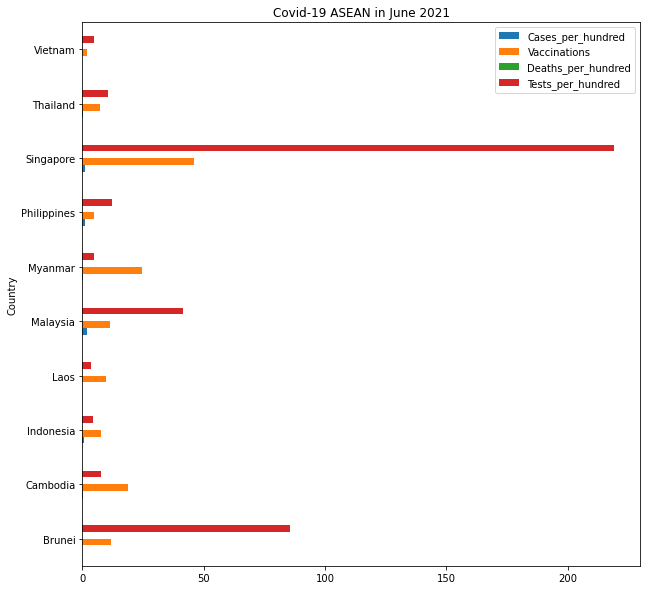

In [108]:
# Plot dataframe
total_plot = covid19_asean_100[['Cases_per_hundred','Vaccinations', 'Deaths_per_hundred', 'Tests_per_hundred']]
total_plot_x = total_plot.plot.barh(title = 'Covid-19 ASEAN in June 2021', figsize = (10,10))
total_plot_x.set_ylabel('Country');

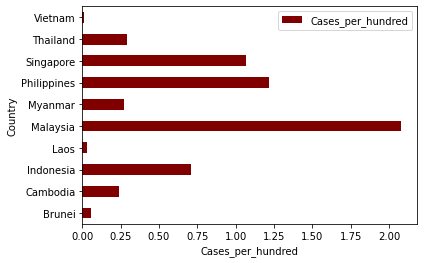

In [117]:
# Plot by Cases
cases = covid19_asean_100[['Cases_per_hundred']].plot(kind = 'barh', color ='maroon');
cases.set_xlabel('Cases_per_hundred')
cases.set_ylabel('Country');

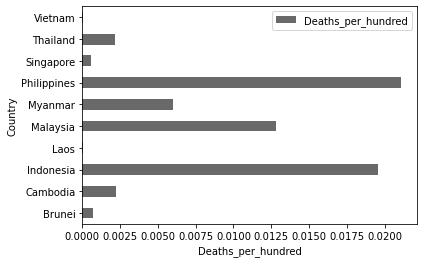

In [118]:
# Plot by Deaths
deaths = covid19_asean_100[['Deaths_per_hundred']].plot(kind = 'barh', color ='dimgrey');
deaths.set_xlabel('Deaths_per_hundred')
deaths.set_ylabel('Country');

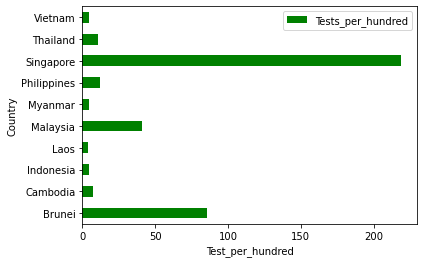

In [119]:
# Plot by Tests
tests = covid19_asean_100[['Tests_per_hundred']].plot(kind = 'barh', color ='green');
tests.set_xlabel('Test_per_hundred')
tests.set_ylabel('Country');

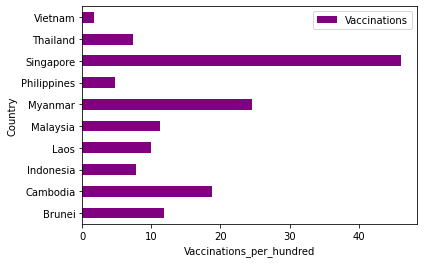

In [120]:
# Plot by Vaccinations
vaccinations = covid19_asean_100[['Vaccinations']].plot(kind = 'barh', color ='purple');
vaccinations.set_xlabel('Vaccinations_per_hundred')
vaccinations.set_ylabel('Country');

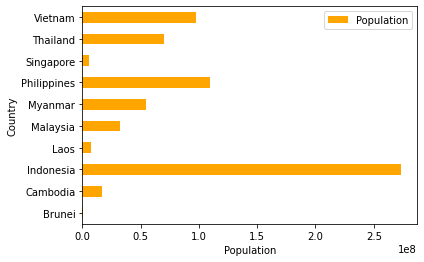

In [121]:
# Plot by Population
population = covid19_asean_100[['Population']].plot(kind = 'barh', color ='orange');
population.set_xlabel('Population')
population.set_ylabel('Country');

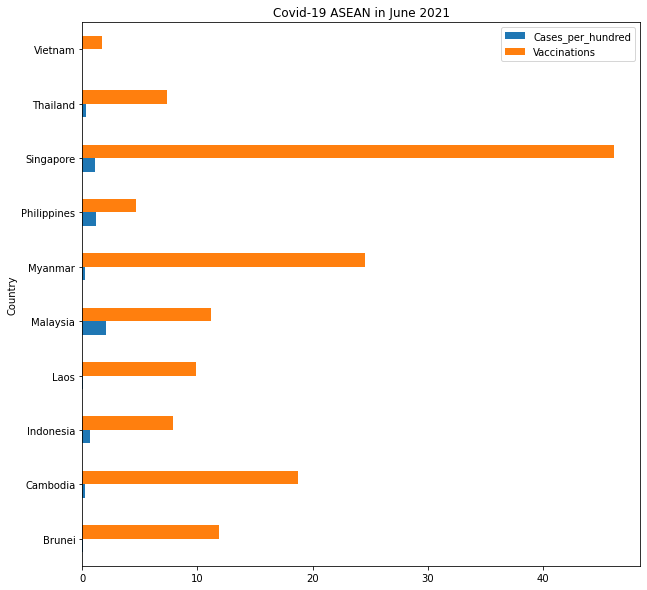

In [122]:
# campare cases vaccine
cv = covid19_asean_100[['Cases_per_hundred','Vaccinations']]
ax = cv.plot.barh(title = 'Covid-19 ASEAN in June 2021', figsize = (10,10))
ax.set_ylabel('Country');

#### Summary of Key Findings/Insights

I have compared the covid health care variables including testing, positive cases, vaccinetion and death rates.  These have been compared among the 10 countries in ASEAN group noting their population sizes.

The test rate in Brunei and Singapore are the highest within ASEAN countries.  This is an important indicator of the accuracy of recorded infection rates as while the case rate in Singapore is the 3rd highest in the region the death rates are the 3rd lowest.  These high test rates contrast with the low testing and low rates but high rates of death in the Philippines and Indonesia.  From this we can conculde that testing is important in reducing the death rate.

With testing being possible before being able to vacinate we expect to see that more people have been tested than vacinated.  However in Cambodia, Indonesia, Laos and Myanmar vacination rates are higher than test rates.  Indonesia has the 2nd highest rate of death and Myanmar has the 4th high rate of deaths.  So in these countires low test rates appear have resulted in high death rates.  The exceptoins being Cambodia and particulary Laos having lower death rates and infection regardless of the proportion of testing to vacination rates. 

There is a correlation between the size of the country's populaiton and the rate of health care variables in the study; high rates of testing and vacination and low rates of death.  The lower populations have positively impacted the health care variables.  Singapore has one of the lowest populaitons in the area and Brunei the lowest.  They have both achieved signinficate test rates and low death rates.

A notable anomoly to the correlation of testing and deaths is Vietnam.  It has the 3rd highest population in the area which has seen low testing and vacination rates though very few cases with the lowest death rate.  The strategy in Vietnam has been to protect the population with very limited movement of people into the country and specific testing rather than increasing the heatlth care variable of testing and vacination.

The rates of infection against death rates are a good indicator of how successful a country has been at caring for patients once cases have been identified.  This reflects the standard of health care and health of the population.  While Singapore comes out best Thailand achieves a low death rate and has a much more significant population.  This may be understood in term of the non-health care variables which are not measured here nor are easily quantifiable.  These include protecting the populatin through restricting movement of people in and around the country.

# Conclusion and Further Work.

By taking data from this online source we can access verified and tracable infomation which can be ordered and visuliaed so conclusions can be derived.  The furher review of the visualised data also reveals that initial conculsion point toward other variable that would help us furhter understand the conculsion of our initial analysis.

The health care variables in this study show correlation in out positive comes though don't always apply to the range of the 10 target countries being studied.  In the case of this study a metric on the level which a country is being locaked down would poduce a usefull insight to help explain some of the out lying counties such as Vietnam.  The confines of the study do however work with strictly measruealbe variables that are more easily compared rather than trying to rank or measure a variable such as lock down level.

We can conculde that looking at countries within this region populaiton level look to influence health care variable which then impact health care out comes of the Covid-19 virus.

# References and Resources

Online at https://github.com/owid/covid-19-data/blob/master/public/data/latest/owid-covid-latest.csv#L3